## BOAZ 16기 분석 Python Quiz

안녕하세요. BOAZ 15기 남상대입니다.

BOAZ 16기 분석으로 들어오시게 되신 분들 모두모두 반갑습니다!!

동아리에 들어오자마자 과제를 드리는 점 너무 죄송합니다.  
앞으로 멘토/멘티 스터디에서 Python 중 어느 부분에 집중하여 진행할 지 구체화하기 위해 퀴즈를 보게되었습니다.

단지, 스터디 방향을 잡기 위함이니 부담 갖지 마시고 편안하게 풀어주셨으면 합니다.  

In [39]:
tf.test.is_gpu_available()
tf.debugging.set_log_device_placement(True)

RuntimeError: Device placement logging must be set at program startup

### 문제 1
#### 다음의 생년월일에서 달만 출력해 주세요.

In [1]:
Birth = '1996-10-03'

In [2]:
print(Birth.split('-')[1])

10


### 문제 2
#### 주어진 리스트에 대해 내림차순을 진행해 주세요.

In [3]:
a = [1,3,5,4,2]

In [4]:
a.sort(reverse = True)

In [5]:
a

[5, 4, 3, 2, 1]

### 문제 3
#### 반복문을 이용하여 1부터 10까지 합을 출력해 주세요.

In [6]:
total = 0
for i in range(10):
    total += (i+1)

In [7]:
total

55

### 문제 4
#### 두 개의 숫자를 입력하면 합을 출력하는 함수(def 활용)를 만들어 주세요. 

In [8]:
def AplusB(a,b):
    print(a+b)

In [9]:
AplusB(1,3)

4


### 문제 5 - 1 
#### 아래 리스트를 이용하여 다음과 같은 데이터 프레임을 만들어 주세요.

In [10]:
import pandas as pd


In [11]:
df = pd.DataFrame({'id':[0,1,2,3,4,5,6], 'keyword':['BOAZ', '시각화', '14/15기', '정규세션', '멘토멘티', '스터디', 'Quiz좋아']})


In [12]:
df

,id,keyword
0,0,BOAZ
1,1,시각화
2,2,14/15기
3,3,정규세션
4,4,멘토멘티
5,5,스터디
6,6,Quiz좋아


### 문제 5 - 2
#### Quiz는 싫으니 Quiz가 있는 행을 제거 해주세요.

In [13]:
df = df.drop(index = 6)

In [14]:
df

,id,keyword
0,0,BOAZ
1,1,시각화
2,2,14/15기
3,3,정규세션
4,4,멘토멘티
5,5,스터디


### 문제 6
#### 다음의 데이터 셋을 통해 각 문제를 해결 해주세요.

In [15]:
import numpy as np
df = pd.DataFrame({
    'user_id': [1,1,2,3,3,3,4,4,5,6],
    'coupon_id': [np.nan, 1, 2, np.nan, 3, 4, 5, np.nan, 6, np.nan],
    'date': ['2020-07-07',np.nan,'2020-07-08','2020-07-09','2020-07-10',np.nan,'2020-07-11','2020-07-12','2020-07-13','2020-07-14'],
    'price': [11000, 20000, 5000, 27000, 15000, 21000, 23000, 25000, 17000, 10000]
})

In [16]:
df

,user_id,coupon_id,date,price
0,1,NaN,2020-07-07,11000
1,1,1.0,NaN,20000
2,2,2.0,2020-07-08,5000
3,3,NaN,2020-07-09,27000
4,3,3.0,2020-07-10,15000
5,3,4.0,NaN,21000
6,4,5.0,2020-07-11,23000
7,4,NaN,2020-07-12,25000
8,5,6.0,2020-07-13,17000
9,6,NaN,2020-07-14,10000


#### 6-1. user_id별 평균 price를 계산하고 평균 price를 기준으로 내림차순 정렬 해주세요.

In [17]:
mean_price = df.groupby(["user_id"])['price'].mean()

In [18]:
mean_price

user_id
1    15500
2     5000
3    21000
4    24000
5    17000
6    10000
Name: price, dtype: int64

In [19]:
new = (df[['user_id', 'price']])
new = new.groupby(["user_id"])["price"].mean()
new = new.reset_index()
new = new.rename(columns = {'price':'mean'})
new.sort_values('mean',ascending = False)


,user_id,mean
3,4,24000
2,3,21000
4,5,17000
0,1,15500
5,6,10000
1,2,5000


,user_id,mean
3,4,24000
2,3,21000
4,5,17000
0,1,15500
5,6,10000
1,2,5000


#### 6-2. coupon_id과 date가 모두 결측치가 아닐때만 쿠폰을 사용한 것입니다. 사용유무를 Y/N로 하여 새로운 열을 만들어 주세요.

In [20]:
len(df)

10

In [21]:
bools = pd.isna(df[['coupon_id', 'date']])
coupon_used = []
for i in range(len(bools)):
    if bools['coupon_id'][i] == bools['date'][i] == False:
        coupon_used.append('Y')
    else:coupon_used.append('N')
df['coupon_used'] = coupon_used

In [22]:
df

,user_id,coupon_id,date,price,coupon_used
0,1,NaN,2020-07-07,11000,N
1,1,1.0,NaN,20000,N
2,2,2.0,2020-07-08,5000,Y
3,3,NaN,2020-07-09,27000,N
4,3,3.0,2020-07-10,15000,Y
5,3,4.0,NaN,21000,N
6,4,5.0,2020-07-11,23000,Y
7,4,NaN,2020-07-12,25000,N
8,5,6.0,2020-07-13,17000,Y
9,6,NaN,2020-07-14,10000,N


### 문제 7
#### 원하시는 머신러닝 모델 1개, 딥러닝 모델 1개를 활용하여 학습을 진행해주시고 Score를 확인해 주세요.
Score의 정도는 전혀 상관없습니다!

In [23]:
from sklearn import datasets

iris = datasets.load_iris()

In [24]:
X = iris.data
y = iris.target

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [26]:
X_train.shape

(112, 4)

In [27]:
X_train[0], y_train[0]

(array([6.1, 2.8, 4. , 1.3]), 1)

In [28]:
(min(y_train), max(y_train))
#class 3개

(0, 2)

### 머신러닝 모델(SVM 사용)

In [29]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm_iris = Pipeline([
    ("scaler", sklearn.preprocessing.StandardScaler()),
    ("linear_svc", LinearSVC(penalty = 'l2', C = 2, loss = "hinge", max_iter = 10000))
])

svm_iris.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=2, loss='hinge', max_iter=10000))])

In [30]:
svm_iris.score(X_test, y_test)

0.9473684210526315

**Score = 0.92105**

### 딥러닝 모델(Tensorflow를 이용한 Dense Layer을 사용해서 만듬)

In [31]:
import tensorflow as tf
model2 = tf.keras.Sequential()
#과대적합을 막기 위해서 배치 정규화 적용
#원래는 마지막 출력층의 활성화 함수 없이 출력 차원을 1로 했었는데 그렇게 한 결과 정확도가 67%에서 발전이 없어서 바꾸어줌
model2.add(tf.keras.layers.Dense(input_shape = [4,], units = 64, activation = 'relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(32, activation = 'relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.BatchNormalization())
#label의 class의 종류가 3개이기 때문에 마지막 출력층의 차원을 3으로 설정하고 활성화 함수는 각 class별 확률값을 출력하는 softmax 함수로 사용
model2.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 2,883
Trainable params: 2,691
Non-trainable params: 192
____________________________________________________

In [32]:
#만약에 one-hot encoding을 y데이터에 적용했다면 그냥 CategoricalCrossentropy를 사용해야 했을 것임
#sgd는 기본 확률적 경사 하강법을 사용하여 모델을 훈련하기 때문에 역전파 알고리즘을 수행하게 된다.
model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'], optimizer = 'sgd')
history = model2.fit(X_train, y_train, validation_split = 0.25, epochs = 1000, verbose = 0)

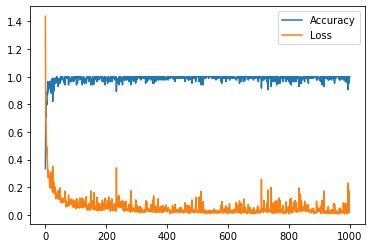

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['Accuracy', 'Loss'])

In [34]:
model2.evaluate(X_test, y_test)

38/38 [==============================] - 0s 289us/sample - loss: 0.1495 - accuracy: 0.9474


[0.14954099555401817, 0.94736844]

**Score = 0.973682**

0.9473684210526315

## 수고하셨습니다 :)